In [1]:
import Estimate_Covariance_Matrix as ECM
from portfolio_choice_functions import ew_implement
from prepare_portfolio_data import define_important_dates, create_date_ranges
from Main import settings, features, pf_set
import pandas as pd
from datetime import datetime
from pandas.tseries.offsets import MonthEnd
from Prepare_Data import process_risk_free_rate, load_and_filter_market_returns_test, wealth_func
import os
import pickle
import time
import prepare_portfolio_data
import data_run_files
import Estimate_Covariance_Matrix
import Prepare_Data
import portfolio_choice_functions
from portfolio_choice_functions import w_fun, m_func
import portfolio_choice_functions
import numpy as np
from dateutil.relativedelta import relativedelta
import importlib
import General_Functions
sqrtm_cpp = importlib.import_module("sqrtm_cpp")

import os
import pandas as pd
import pyreadr


Features list length: 154


In [2]:
import pandas as pd
import numpy as np
import os
import pickle
from pandas.tseries.offsets import MonthEnd
from Main import settings, features, pf_set
from datetime import datetime
import portfolio_choice_functions
import General_Functions
import prepare_portfolio_data
import data_run_files
import Estimate_Covariance_Matrix
import Prepare_Data
import Estimate_Covariance_Matrix as ECM
import Prepare_Data
# Path to save the portfolios.
output_path = "./data_test/"


# indhent barra_cov
barra_cov = ECM.main()
# indhent wealth
wealth = Prepare_Data.main()
wealth = wealth.dropna(subset=['wealth'])

chars, lambda_list, first_cov_date, hp_years, start_oos, date_ranges, risk_free = prepare_portfolio_data.main(barra_cov)
dates_m1 = date_ranges["dates_m1"]
dates_m2 = date_ranges["dates_m2"]
dates_oos = date_ranges["dates_oos"]
dates_hp = date_ranges["dates_hp"]


# Benchmark portfolios ------------------------------------------
# Markowitz-ML
tpf = portfolio_choice_functions.tpf_implement(data=chars, cov_list=barra_cov, wealth=wealth, dates=dates_oos, gam=pf_set["gamma_rel"])

# Factor-ML
factor_ml = portfolio_choice_functions.factor_ml_implement(data = chars, wealth = wealth, dates= dates_oos, n_pfs=settings["factor_ml"]["n_pfs"]
 , gam=pf_set['gamma_rel'])

# Market
mkt = portfolio_choice_functions.mkt_implement(data=chars, wealth=wealth, dates=dates_oos, pf_set= pf_set)

# 1/n
ew = portfolio_choice_functions.ew_implement(data=chars, wealth=wealth, dates=dates_oos, pf_set=pf_set)

# Fama-MacBeth / Rank weighted portfolios
rw = portfolio_choice_functions.rw_implement(data=chars, wealth=wealth, dates=dates_oos, pf_set= pf_set)

# Minimum variance
mv = portfolio_choice_functions.mv_implement(data=chars, cov_list=barra_cov ,wealth=wealth, dates=dates_oos, pf_set= pf_set)


# Saml porteføljerne i én DataFrame
bm_pfs = pd.concat([tpf["pf"], factor_ml["pf"], ew["pf"], mkt["pf"], rw["pf"], mv["pf"]], ignore_index=True)

# Gem resultatet som en CSV-fil
bm_pfs.to_csv(f"{output_path}/bms.csv", index=False)


static = portfolio_choice_functions.static_implement(
    data_tc=chars,
    cov_list=barra_cov,
    lambda_list=lambda_list,
    rf=risk_free,              # Data
    wealth=wealth,
    mu=pf_set['mu'],
    gamma_rel=pf_set['gamma_rel'],  # Investor
    dates_full=dates_m1,
    dates_oos=dates_oos,
    dates_hp=dates_hp,
    hp_years=hp_years,          # Dates
    k_vec=settings['pf']['hps']['static']['k'],
    u_vec=settings['pf']['hps']['static']['u'],
    g_vec=settings['pf']['hps']['static']['g'],
    cov_type=settings['pf']['hps']['cov_type'],
    validation=None
)

print(static)

All missing excludes 0.38% of the observations


KeyError: "['start', 'end', 'merge_date'] not found in axis"

In [70]:


# Sti til din base-mappe
base_path = "./data_test/"
# Hent liste over undermapper/filer


# Saml porteføljerne i én DataFrame inklusiv Static-ML
bm_pfs = pd.concat(
    [tpf["pf"], factor_ml["pf"], ew["pf"], mkt["pf"], rw["pf"], mv["pf"], static["pf"]], 
    ignore_index=True
)

# Gem resultatet som CSV
bm_pfs.to_csv(f"{output_path}/bms.csv", index=False)

# Læs CSV-filen med pandas
bm_pfs = pd.read_csv(os.path.join(base_path, "bms.csv"))

# Konverter eom_ret til dato
bm_pfs['eom_ret'] = pd.to_datetime(bm_pfs['eom_ret'])

# Erstat "Rank-Weighted" med "Rank-ML" i kolonnen type
bm_pfs.loc[bm_pfs['type'] == 'Rank-Weighted', 'type'] = 'Rank-ML'




In [71]:
bm_pfs["type"].unique()

array(['Markowitz-ML', 'Factor-ML', '1/N', 'Market', 'Rank-ML',
       'Minimum Variance', 'Static-ML*'], dtype=object)

In [72]:
pfs = bm_pfs



In [73]:
pfs

,inv,shorting,turnover,r,tc,eom_ret,type
0,10.245634,4.734082,10.437974,-0.121086,3.659551,2020-01-31,Markowitz-ML
1,9.869913,4.526659,7.987228,-0.124307,1.838792,2020-02-29,Markowitz-ML
2,9.087734,4.223161,6.378685,-0.019131,1.009126,2020-03-29,Markowitz-ML
3,4.521440,2.185952,6.583944,0.039457,0.787049,2020-04-30,Markowitz-ML
4,4.404835,2.145497,3.623036,0.060375,0.272886,2020-05-30,Markowitz-ML
...,...,...,...,...,...,...,...
324,0.388546,0.133994,0.083304,0.000591,0.000095,2023-07-30,Static-ML*
325,0.382881,0.128390,0.080075,-0.000042,0.000096,2023-08-31,Static-ML*
326,0.396634,0.130704,0.095526,-0.004996,0.000132,2023-09-30,Static-ML*
327,0.423268,0.139806,0.090370,-0.003483,0.000137,2023-10-30,Static-ML*


In [76]:
import pandas as pd


gamma_rel = pf_set["gamma_rel"]  

# Beregn portefølje-sammenfatningsstatistikker
pf_summary = pfs.groupby("type").agg(
    n=("eom_ret", "count"),  # Antal observationer
    inv=("inv", "mean"),  # Gennemsnitlig investering
    shorting=("shorting", "mean"),  # Gennemsnitlig shorting
    turnover_notional=("turnover", "mean"),  # Gennemsnitlig omsætning (turnover)
    r=("r", lambda x: x.mean() * 12),  # Gennemsnitligt afkast annualiseret
    sd=("r", lambda x: x.std() * (12**0.5)),  # Volatilitet annualiseret
    sr_gross=("r", lambda x: x.mean() / x.std() * (12**0.5) if x.std() > 0 else None),  # Sharpe Ratio før transaktionsomkostninger
    tc=("tc", lambda x: x.mean() * 12),  # Gennemsnitlige transaktionsomkostninger annualiseret
    r_tc=("r", lambda x: (x - pfs.loc[x.index, "tc"]).mean() * 12),  # Nettoafkast efter transaktionsomkostninger
    sr=("r", lambda x: (x - pfs.loc[x.index, "tc"]).mean() / x.std() * (12**0.5) if x.std() > 0 else None),  # Sharpe Ratio efter transaktionsomkostninger
    obj=("r", lambda x: (x.mean() - 0.5 * x.var() * gamma_rel - pfs.loc[x.index, "tc"].mean()) * 12)  # Optimeringsmål
).reset_index()

# Sorter efter type
pf_summary = pf_summary.sort_values(by="type")

# Filtrer pfs til kun at inkludere de relevante typer (main_types skal defineres)
main_types = ["Markowitz-ML", "Factor-ML", "Market", "Rank-ML", "Minimum Variance", "Static-ML"]  # Tilpas efter behov
pfs = pfs[pfs["type"].isin(main_types)]
pfs["type"] = pd.Categorical(pfs["type"], categories=main_types, ordered=True)

# Vis resultatet
from IPython.display import display
display(pf_summary)


C:\Users\andre\AppData\Local\Temp\ipykernel_15960\1679617200.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.


,type,n,inv,shorting,turnover_notional,r,sd,sr_gross,tc,r_tc,sr,obj
0,Markowitz-ML,47,14.624759,7.059826,12.099872,0.134686,0.371549,0.362498,69.611187,-69.476501,-186.991672,-70.166743
1,Factor-ML,47,2.000000,1.000000,2.051815,-0.029966,0.207817,-0.144196,2.142726,-2.172692,-10.454826,-2.388632
2,Market,47,1.000000,0.000000,0.009486,0.118407,0.191524,0.618236,0.000034,0.118373,0.618059,-0.065035
3,Rank-ML,47,0.994220,0.497110,0.619369,0.012230,0.050724,0.241102,0.142922,-0.130692,-2.576523,-0.143557
4,Minimum Variance,47,2.572656,0.786328,1.217601,0.058686,0.159680,0.367520,0.575743,-0.517057,-3.238084,-0.644546
5,Static-ML,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [75]:
import pandas as pd
import numpy as np

# Antag, at du har en DataFrame 'pfs' og en liste med main_types:
main_types = ["Markowitz-ML", "Factor-ML", "Market", "Rank-ML", "Minimum Variance", "Static-ML"]

# Konverter 'eom_ret' til datetime
pfs['eom_ret'] = pd.to_datetime(pfs['eom_ret'])

# Udtræk unikke typer
types = pfs['type'].unique()

# Udregn kumulative summer pr. type
pfs['cumret'] = pfs.groupby('type', observed=False)['r'].cumsum()
pfs['cumret_tc'] = (pfs['r'] - pfs['tc']).groupby(pfs['type'], observed=False).cumsum()

# Filtrer 'pfs' for de ønskede typer og vælg de relevante kolonner
ts_data = pfs[pfs['type'].isin(main_types)][['type', 'eom_ret', 'cumret', 'cumret_tc']].copy()

# "Pivot longer" - konverter DataFrame'en fra bredt til langt format
ts_data = ts_data.melt(id_vars=['type', 'eom_ret'],
                       value_vars=['cumret', 'cumret_tc'],
                       var_name='name',
                       value_name='value')

# Opret ekstra rækker med 'eom_ret' sat til månedsafslutningen for den tidligste dato
min_date = pfs['eom_ret'].min()
eom = min_date + pd.offsets.MonthEnd(0)

extra_df = pd.DataFrame({
    'eom_ret': [eom] * (2 * len(types)),
    'type': np.tile(types, 2),
    'value': 0,
    'name': np.concatenate([
        np.repeat("cumret", len(types)),
        np.repeat("cumret_tc", len(types))
    ])
})

# Kombiner de oprindelige data med de ekstra rækker
ts_data = pd.concat([ts_data, extra_df], ignore_index=True)

# Tilføj en ny kolonne 'name_pretty' med pæne navne
mapping = {
    "cumret": "Gross return",
    "cumret_tc": "Return net of TC"
}
ts_data['name_pretty'] = ts_data['name'].map(mapping)
ts_data['name_pretty'] = pd.Categorical(ts_data['name_pretty'],
                                         categories=["Gross return", "Return net of TC"],
                                         ordered=True)
ts_data 

,type,eom_ret,name,value,name_pretty
0,Markowitz-ML,2020-01-31,cumret,-0.121086,Gross return
1,Markowitz-ML,2020-02-29,cumret,-0.245393,Gross return
2,Markowitz-ML,2020-03-29,cumret,-0.264525,Gross return
3,Markowitz-ML,2020-04-30,cumret,-0.225068,Gross return
4,Markowitz-ML,2020-05-30,cumret,-0.164693,Gross return
...,...,...,...,...,...
475,Markowitz-ML,2020-01-31,cumret_tc,0.000000,Return net of TC
476,Factor-ML,2020-01-31,cumret_tc,0.000000,Return net of TC
477,Market,2020-01-31,cumret_tc,0.000000,Return net of TC
478,Rank-ML,2020-01-31,cumret_tc,0.000000,Return net of TC


In [68]:
ts_data["type"].unique()

array(['Markowitz-ML', 'Factor-ML', 'Market', 'Rank-ML',
       'Minimum Variance'], dtype=object)

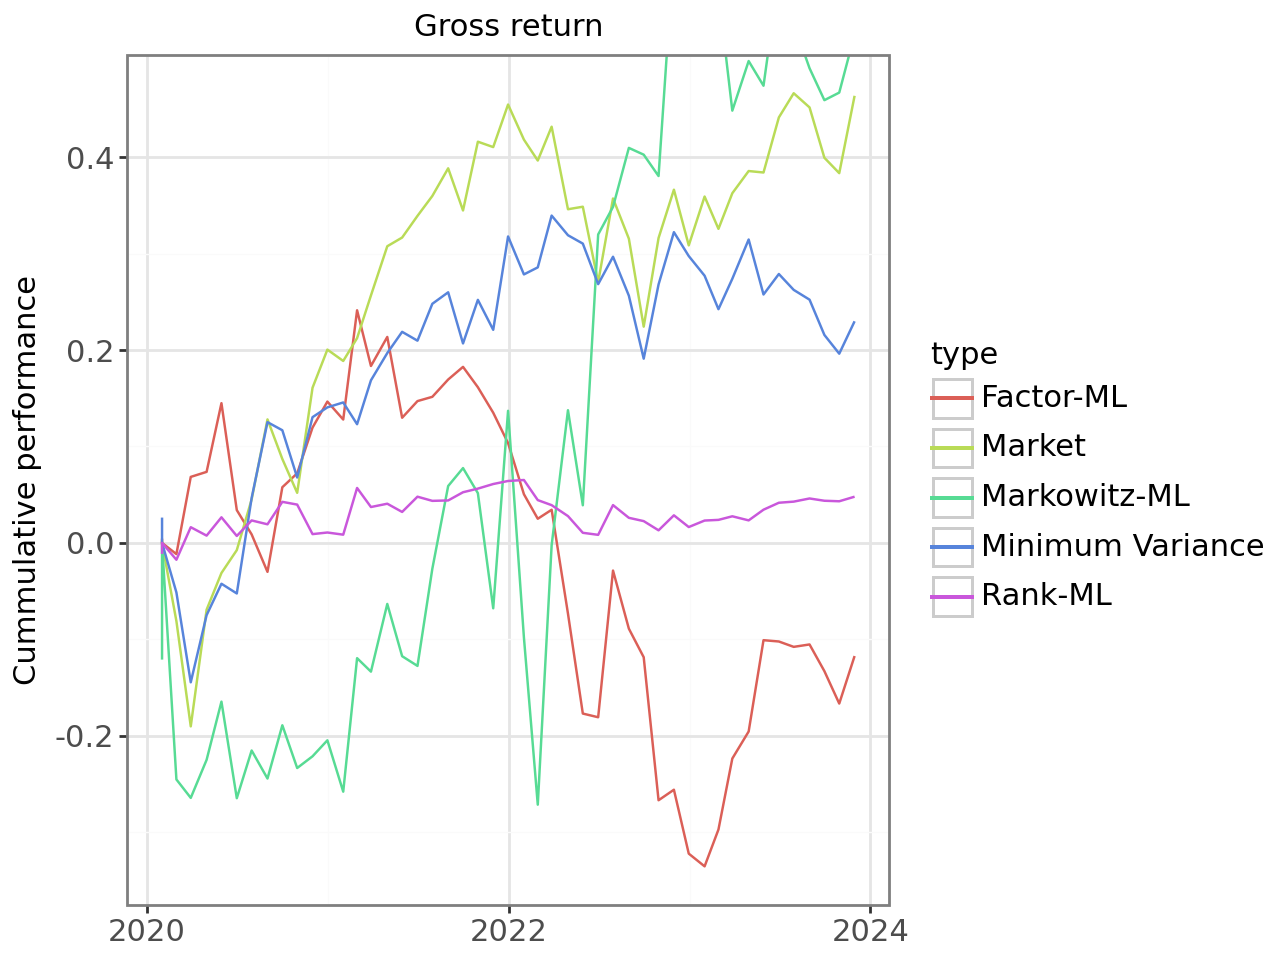

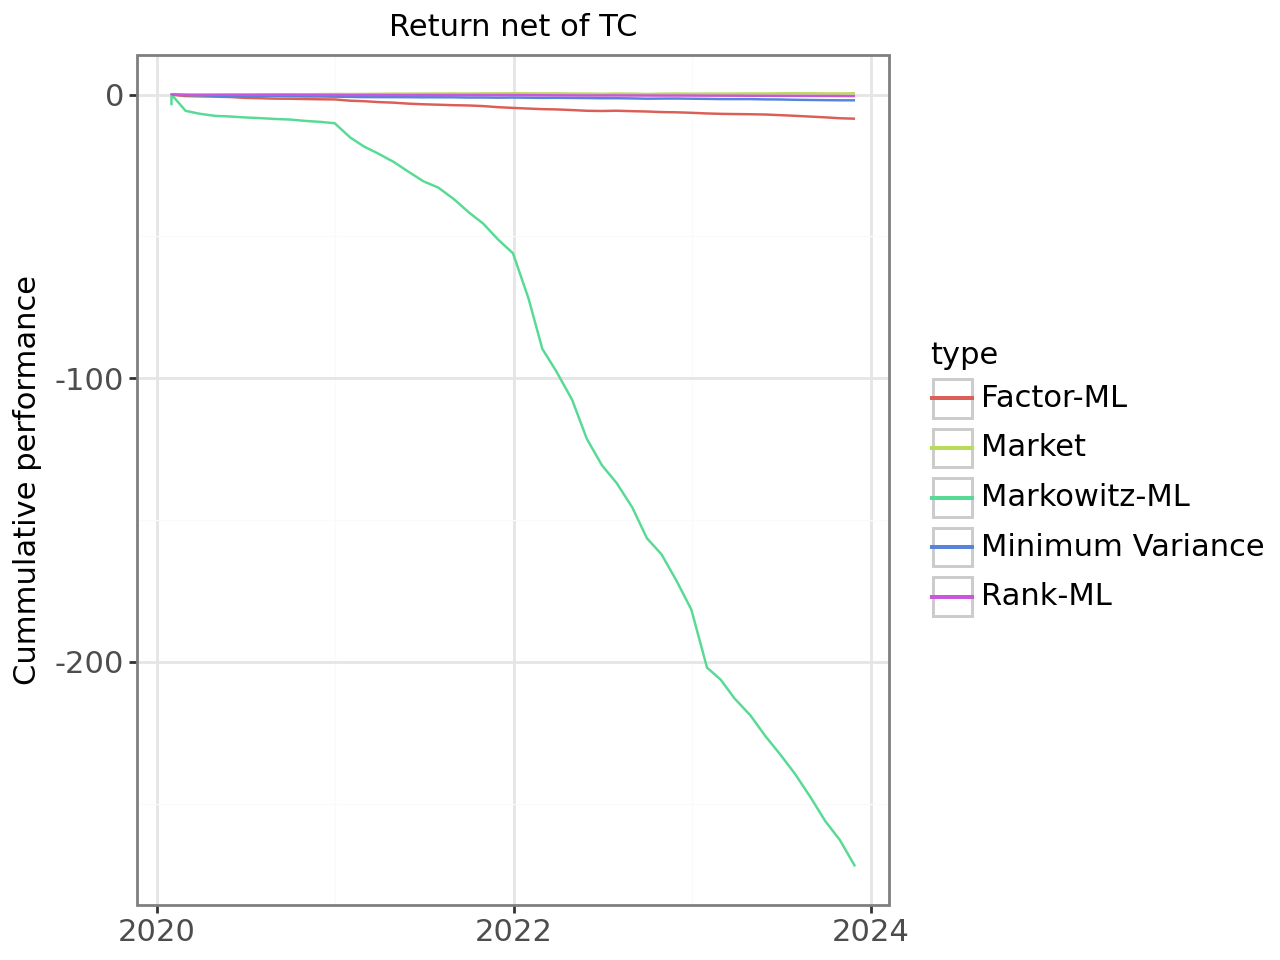

In [8]:
from IPython.display import display
from plotnine import ggplot, aes, geom_line, labs, scale_x_datetime, coord_cartesian, theme_bw, theme, element_text
import pandas as pd

# Antag, at ts_data allerede findes med kolonnerne:
# 'eom_ret', 'value', 'type', 'name' og 'name_pretty'

# Plot for "cumret" (Gross return)
df_cumret = ts_data[ts_data['name'] == 'cumret'].copy()
# Juster y-aksen baseret på data, der ikke er "Markowitz-ML"
df_non_mark = df_cumret[df_cumret['type'] != "Markowitz-ML"]
y_min, y_max = df_non_mark['value'].min(), df_non_mark['value'].max()

plot_cumret = (ggplot(df_cumret, aes(x='eom_ret', y='value', color='type'))
               + geom_line()
               + labs(title="Gross return", y="Cummulative performance", x="")
               + scale_x_datetime(date_labels="%Y")
               + coord_cartesian(ylim=(y_min, y_max))
               + theme_bw()
               + theme(text=element_text(size=11))
              )

# Plot for "cumret_tc" (Return net of TC)
df_cumret_tc = ts_data[ts_data['name'] == 'cumret_tc'].copy()

plot_cumret_tc = (ggplot(df_cumret_tc, aes(x='eom_ret', y='value', color='type'))
                  + geom_line()
                  + labs(title="Return net of TC", y="Cummulative performance", x="")
                  + scale_x_datetime(date_labels="%Y")
                  + theme_bw()
                  + theme(text=element_text(size=11))
                 )

# Vis plottene (hvis du kører i en Jupyter Notebook)
display(plot_cumret)
display(plot_cumret_tc)


# Risk

In [9]:
import pandas as pd
import numpy as np
import os
import pickle
from pandas.tseries.offsets import MonthEnd
from Main import settings, features, pf_set
from datetime import datetime
import portfolio_choice_functions
import General_Functions
import prepare_portfolio_data
import data_run_files
import Estimate_Covariance_Matrix
import Prepare_Data
import Estimate_Covariance_Matrix as ECM
import Prepare_Data
# Path to save the portfolios.
output_path = "./data_test/"


# indhent barra_cov
barra_cov = ECM.main()
# indhent wealth
wealth = Prepare_Data.main()
wealth = wealth.dropna(subset=['wealth'])

chars, lambda_list, first_cov_date, hp_years, start_oos, date_ranges, risk_free = prepare_portfolio_data.main(barra_cov)
dates_m1 = date_ranges["dates_m1"]
dates_m2 = date_ranges["dates_m2"]
dates_oos = date_ranges["dates_oos"]
dates_hp = date_ranges["dates_hp"]


# Benchmark portfolios ------------------------------------------
# Markowitz-ML
tpf = portfolio_choice_functions.tpf_implement(data=chars, cov_list=barra_cov, wealth=wealth, dates=dates_oos, gam=pf_set["gamma_rel"])

# Factor-ML
factor_ml = portfolio_choice_functions.factor_ml_implement(data = chars, wealth = wealth, dates= dates_oos, n_pfs=settings["factor_ml"]["n_pfs"]
 , gam=pf_set['gamma_rel'])

# Market
mkt = portfolio_choice_functions.mkt_implement(data=chars, wealth=wealth, dates=dates_oos, pf_set= pf_set)

# 1/n
ew = portfolio_choice_functions.ew_implement(data=chars, wealth=wealth, dates=dates_oos, pf_set=pf_set)

# Fama-MacBeth / Rank weighted portfolios
rw = portfolio_choice_functions.rw_implement(data=chars, wealth=wealth, dates=dates_oos, pf_set= pf_set)

# Minimum variance
mv = portfolio_choice_functions.mv_implement(data=chars, cov_list=barra_cov ,wealth=wealth, dates=dates_oos, pf_set= pf_set)


All missing excludes 0.60% of the observations
Filen er indlæst og filtreret succesfuldt.
No size screen
Turnover wo addition/deletion rule: 0.19%
Turnover w  addition/deletion rule: 33.72%


Processerer datoer: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 72/72 [00:00<00:00, 198.58it/s]


Fil indlæst med succes. Antal rækker før filtrering: 1373911
Antal ikke-NaN værdier i 'rvol_252d' i rvol_252 før merge: 2199588
Antal ikke-NaN værdier i 'rvol_252d' i df efter merge: 1353529
      id        eom  rvol_252d
0  10006 1952-08-31   0.012671
1  10006 1952-09-30   0.012712
2  10006 1952-10-31   0.011661
3  10006 1952-11-30   0.011523
4  10006 1952-12-31   0.011812
5  10006 1953-01-31   0.011484
6  10006 1953-02-28   0.011835
7  10006 1953-03-31   0.012331
8  10006 1953-04-30   0.012696
9  10006 1953-05-31   0.013877
Filen 'usa_rvol.parquet' er gemt succesfuldt i ./Data mappen!
Filen er indlæst og filtreret succesfuldt.
All missing excludes 0.60% of the observations
All missing excludes 0.60% of the observations
Filen er indlæst og filtreret succesfuldt.
No size screen
Turnover wo addition/deletion rule: 0.19%
Turnover w  addition/deletion rule: 33.72%
df_merged head:
      eom_ret     id        eom  valid_ret excntry         me   sic size_grp  \
0  1952-09-30  10006 1952-08-3

In [29]:
tpf_w = tpf["w"]
factor_ml_w = factor_ml["w"]
mkt_w = mkt["w"]
ew_w = ew["w"]
rw_w = rw["w"]
mv_w =mv["w"]
static_w = static["w"]

In [16]:
#barra_cov

In [17]:
mv_w

,id,eom,w_start,w,tr_ld1,mu_ld1
0,10104,2019-12-31,0.008246,-0.002097,NaN,NaN
1,10104,2020-01-31,-0.002089,0.006524,-0.005238,-0.001351
2,10104,2020-02-29,0.006687,0.015328,-0.056915,-0.079921
3,10104,2020-03-31,0.017387,0.010766,-0.022915,-0.138610
4,10104,2020-04-30,0.010461,0.005417,0.102269,0.134423
...,...,...,...,...,...,...
8079,92655,2023-06-30,0.004197,-0.020180,-0.010165,0.069017
8080,92655,2023-07-31,-0.020501,0.000992,0.053142,0.036647
8081,92655,2023-08-31,0.000952,-0.006874,-0.058868,-0.019997
8082,92655,2023-09-30,-0.007670,-0.000879,0.062111,-0.048173


In [13]:
def expected_risk_fun(ws, dates, cov_list):
    """
    Udregner den forventede porteføljerisiko for hver porteføljetype og dato.

    Parametre:
      ws       : DataFrame med kolonnerne 'type', 'eom', 'id' og 'w'
      dates    : Iterabel af datoer (skal matche ws['eom'])
      cov_list : Ordbog, hvor nøgler er datoer (som str) og værdier er covariance-objekter

    Returnerer:
      En DataFrame med kolonnerne: 'type', 'pf_var' (porteføljevarians) og 'eom'
    """
    # Sørg for, at ws er sorteret efter type, eom og id
    ws = ws.sort_values(by=["type", "eom", "id"]).copy()
    types = ws["type"].unique()
    
    # Split ws i grupper efter 'eom'
    w_groups = dict(tuple(ws.groupby("eom")))
    
    result_list = []
    for d in dates:
        # Sørg for, at d matcher nøglerne i w_groups.
        # Hvis ws['eom'] er af type datetime, kan d være en datetime.
        # Hvis cov_list-nøgler er strings, omdannes d til string.
        key = d
        if key not in w_groups:
            # Prøv at konvertere d til string og se, om den findes
            key = str(d)
            if key not in w_groups:
                continue  # spring datoer over, der ikke findes i ws
        w_sub = w_groups[key]
        
        # Udtræk de unikke ids i denne dato
        ids = w_sub["id"].unique()
        
        # Hent covariance-objektet for datoen.
        cov_key = str(d)
        if cov_key not in cov_list:
            continue  # spring datoer over, hvor vi ikke har kovarians
        cov_obj = cov_list[cov_key]
        
        # Udtræk kovariansmatrixen for de relevante ids
        sigma = create_cov(cov_obj, ids=[str(i) for i in ids])
        
        # For hver porteføljetype, beregn porteføljevariansen
        for t in types:
            # Filtrer w_sub for den aktuelle type
            w_vec = w_sub[w_sub["type"] == t]["w"].values
            if len(w_vec) == 0:
                continue
            # Beregn pf_var = w^T * sigma * w.
            # Her antages w_vec som en 1D numpy-array.
            pf_var = np.dot(w_vec, np.dot(sigma, w_vec))
            result_list.append({"type": t, "pf_var": pf_var, "eom": d})
    
    return pd.DataFrame(result_list)

In [14]:
def create_cov(cov_obj, ids):
    """
    Udtrækker kovariansmatrixen for de givne ids.
    
    Parametre:
      cov_obj : Et dictionary-element fra cov_list. Fx:
                {
                  'fct_load': <DataFrame med factor loadings>,
                  'fct_cov': <DataFrame med covariance matrix>
                }
      ids     : En liste af id'er (som strings eller integers), for hvilke
                kovariansmatrixen skal udtrækkes.
    
    Returnerer:
      En numpy-array, der svarer til kovariansmatrixen for de specificerede id'er.
    """
    # Udtræk covariance DataFrame (her antages det, at id'erne både findes i index og kolonner)
    cov_df = cov_obj['fct_cov']
    
    # Sørg for, at id'erne er af den type, som index og kolonner har.
    # Fx hvis de er strings, konverter da ids til strings:
    ids = [str(i) for i in ids]
    
    # Vælg de rækker og kolonner, der svarer til de ønskede id'er.
    # Her anvender vi .loc til at subsette DataFrame'en.
    sub_cov = cov_df.loc[cov_df.index.intersection(ids), cov_df.columns.intersection(ids)]
    
    return sub_cov.values


In [19]:
def create_cov(cov_obj, ids):
    """
    Udtrækker asset covariance matrix ud fra et cov_obj med nøgler:
      - 'fct_load': DataFrame med faktor loadings (rækker = asset id, kolonner = faktorer)
      - 'fct_cov' : DataFrame med faktor covariance (index/kolonner = faktorer)
      - 'ivol_vec': Series med idiosynkratisk volatilitet (index = asset id)
    
    Parameter:
      ids: En liste af asset id'er (forventes at kunne konverteres til int)
    
    Returnerer:
      sigma_asset: numpy array med asset covariance for de assets, der findes både i ids og fct_load
      common_ids: de anvendte asset id'er (i sorteret rækkefølge)
    """
    # Konverter de modtagne ids til int
    try:
        ids_int = [int(i) for i in ids]
    except Exception as e:
        print("Fejl ved konvertering af ids:", e)
        ids_int = ids

    fct_load = cov_obj['fct_load'].copy()
    fct_cov = cov_obj['fct_cov']
    ivol_vec = cov_obj['ivol_vec'].copy()
    
    # Sørg for, at index i fct_load og ivol_vec er ints
    fct_load.index = fct_load.index.astype(int)
    ivol_vec.index = ivol_vec.index.astype(int)
    
    # Få de asset id'er, som både findes i fct_load og i ids_int, og sorter dem
    common_ids = np.sort(fct_load.index.intersection(pd.Index(ids_int)))
    if len(common_ids) == 0:
        print("Advarsel: Ingen fælles id'er fundet for ids:", ids_int)
        return np.empty((0,0)), []
    
    # Subset faktor loadings og ivol for de fælles assets
    B = fct_load.loc[common_ids, :]
    ivols = ivol_vec.loc[common_ids]
    
    # Faktor covariance matrix (F) – antages at have faktorer som index/kolonner
    F = fct_cov  
    # Udregn asset covariance via faktor modellen
    sigma_factor = B.dot(F).dot(B.T)
    D = np.diag(ivols**2)
    sigma_asset = sigma_factor + D
    
    return sigma_asset, common_ids

def expected_risk_fun(ws, dates, cov_list):
    """
    Beregner porteføljens risiko (varians) for hver porteføljetype og dato.
    
    Parameter:
      ws       : DataFrame med kolonnerne 'type', 'eom', 'id' og 'w'
      dates    : Iterabel af datoer (som Timestamps, fx dates_oos)
      cov_list : Ordbog, hvor nøgler er datoer (Timestamps) og værdier er cov_obj'er
                 (se create_cov)
    
    Returnerer:
      En DataFrame med kolonnerne 'type', 'pf_var' og 'eom'
    """
    ws = ws.sort_values(by=["type", "eom", "id"]).copy()
    types = ws["type"].unique()
    w_groups = dict(tuple(ws.groupby("eom")))
    
    result_list = []
    for d in dates:
        if d not in w_groups:
            print(f"Datum {d} findes ikke i ws.")
            continue
        w_sub = w_groups[d]
        ids = w_sub["id"].unique()
        
        # Da cov_list nu har Timestamps som nøgler, brug d direkte:
        cov_key = d
        if cov_key not in cov_list:
            print(f"Kovarians for {d} findes ikke i cov_list.")
            continue
        
        cov_obj = cov_list[cov_key]
        sigma, common_ids = create_cov(cov_obj, ids=ids)
        if sigma.size == 0:
            continue
        
        for t in types:
            # Vælg rækker for den aktuelle type
            w_series = w_sub[w_sub["type"] == t].set_index("id")["w"]
            # Reindeksér w_series, så rækkefølgen svarer til common_ids
            w_ordered = w_series.reindex(common_ids)
            # Hvis der mangler vægte for nogle assets, drop dem
            if w_ordered.isnull().any():
                available_ids = w_ordered.dropna().index.values
                if len(available_ids) == 0:
                    continue
                indices = [i for i, cid in enumerate(common_ids) if cid in available_ids]
                sigma_sub = sigma[np.ix_(indices, indices)]
                w_ordered = w_ordered.dropna().values
            else:
                sigma_sub = sigma
                w_ordered = w_ordered.values
            if len(w_ordered) == 0:
                continue
            # Beregn portefølje varians: pf_var = w^T * sigma * w
            pf_var = np.dot(w_ordered, np.dot(sigma_sub, w_ordered))
            result_list.append({"type": t, "pf_var": pf_var, "eom": d})
    return pd.DataFrame(result_list)


In [31]:
tpf_w

,id,eom,w_start,w,tr_ld1,mu_ld1
0,10104,2019-12-31,0.008246,-0.053624,NaN,NaN
1,10104,2020-01-31,-0.053415,0.044328,-0.005238,-0.001351
2,10104,2020-02-29,0.045436,0.022733,-0.056915,-0.079921
3,10104,2020-03-31,0.025786,0.019993,-0.022915,-0.138610
4,10104,2020-04-30,0.019426,-0.008307,0.102269,0.134423
...,...,...,...,...,...,...
8079,92655,2023-06-30,-0.037091,-0.022380,-0.010165,0.069017
8080,92655,2023-07-31,-0.022736,0.016122,0.053142,0.036647
8081,92655,2023-08-31,0.015483,-0.159241,-0.058868,-0.019997
8082,92655,2023-09-30,-0.177691,0.035650,0.062111,-0.048173


In [30]:
static_w

,id,eom,w_start,w,tr_ld1,pred_ld1,mu_ld1
0,10104,2019-12-31,0.008246,NaN,-0.005238,0.005687,-0.001351
1,10104,2020-01-31,0.000000,NaN,-0.056915,0.007637,-0.079921
2,10104,2020-02-29,0.000000,NaN,-0.022915,0.007243,-0.138610
3,10104,2020-03-31,0.000000,NaN,0.102269,0.007684,0.134423
4,10104,2020-04-30,0.000000,NaN,0.015044,0.006400,0.056227
...,...,...,...,...,...,...,...
8079,92655,2023-06-30,0.001363,0.000912,0.053142,0.010123,0.036647
8080,92655,2023-07-31,0.000927,0.000743,-0.058868,0.009493,-0.019997
8081,92655,2023-08-31,0.000713,-0.000597,0.062111,0.007627,-0.048173
8082,92655,2023-09-30,-0.000666,0.000769,0.061804,0.010406,-0.029172


In [39]:
ws = ws.dropna()

In [44]:
import pandas as pd
import numpy as np
from plotnine import ggplot, aes, geom_line, labs, scale_y_log10, facet_wrap, theme, element_blank
from IPython.display import display

# --- 1. Kombinér porteføljevægtene ---

# Tilføj en 'type'-kolonne til hver af de enkelte DataFrames:
tpf_w['type'] = "Markowitz-ML"
factor_ml_w['type'] = "Factor-ML"
mkt_w['type'] = "Market"
ew_w['type'] = "Equal-Weight"
rw_w['type'] = "Risk-Weighted"
mv_w['type'] = "Minimum Variance"
static_w['type'] = "Static-ML"
# Sammensæt vægtene til én DataFrame:
ws = pd.concat([tpf_w, factor_ml_w, mkt_w, ew_w, rw_w, mv_w, static_w], ignore_index=True)

# Angiv den ønskede rækkefølge for porteføljetyperne:
pf_order = ["Markowitz-ML", "Factor-ML", "Market", "Equal-Weight", "Risk-Weighted", "Minimum Variance", "Static-ML"]
ws['type'] = pd.Categorical(ws['type'], categories=pf_order, ordered=True)
if 'eom' not in ws.columns:
    ws['eom'] = ws['eom_ret']


barra_cov = {pd.to_datetime(k): v for k, v in barra_cov.items()}

# Find mindste dato i ws (brug evt. ws['eom'] eller 'eom_ret')
min_date = ws['eom'].min()
# Filtrer barra_cov så vi kun beholder de nøgler, der ligger på eller efter min_date
barra_cov = {k: v for k, v in barra_cov.items() if k >= min_date}

In [45]:
ws

,id,eom,w_start,w,tr_ld1,mu_ld1,type,pred_ld1
0,10104,2019-12-31,0.008246,-0.053624,NaN,NaN,Markowitz-ML,NaN
1,10104,2020-01-31,-0.053415,0.044328,-0.005238,-0.001351,Markowitz-ML,NaN
2,10104,2020-02-29,0.045436,0.022733,-0.056915,-0.079921,Markowitz-ML,NaN
3,10104,2020-03-31,0.025786,0.019993,-0.022915,-0.138610,Markowitz-ML,NaN
4,10104,2020-04-30,0.019426,-0.008307,0.102269,0.134423,Markowitz-ML,NaN
...,...,...,...,...,...,...,...,...
56583,92655,2023-06-30,0.001363,0.000912,0.053142,0.036647,Static-ML,0.010123
56584,92655,2023-07-31,0.000927,0.000743,-0.058868,-0.019997,Static-ML,0.009493
56585,92655,2023-08-31,0.000713,-0.000597,0.062111,-0.048173,Static-ML,0.007627
56586,92655,2023-09-30,-0.000666,0.000769,0.061804,-0.029172,Static-ML,0.010406


In [48]:
ws['eom'] = pd.to_datetime(ws['eom']).dt.to_period('M').dt.to_timestamp('M')
barra_cov = {pd.to_datetime(k): v for k, v in barra_cov.items()}

pf_vars = expected_risk_fun(ws, dates=dates_oos, cov_list=barra_cov)
print(pf_vars)
pf_vars["type"].unique()

                 type    pf_var        eom
0        Markowitz-ML  0.000548 2019-12-31
1           Factor-ML  0.000406 2019-12-31
2              Market  0.001417 2019-12-31
3        Equal-Weight  0.001338 2019-12-31
4       Risk-Weighted  0.000029 2019-12-31
..                ...       ...        ...
311            Market  0.002046 2023-10-31
312      Equal-Weight  0.002090 2023-10-31
313     Risk-Weighted  0.000026 2023-10-31
314  Minimum Variance  0.001143 2023-10-31
315         Static-ML  0.000032 2023-10-31

[316 rows x 3 columns]


array(['Markowitz-ML', 'Factor-ML', 'Market', 'Equal-Weight',
       'Risk-Weighted', 'Minimum Variance', 'Static-ML'], dtype=object)

In [53]:
print(pfs[pfs["type"] == "Static-ML"])


Empty DataFrame
Columns: [inv, shorting, turnover, r, tc, eom_ret, type, cumret, cumret_tc]
Index: []


In [50]:
print(comp_stats[comp_stats["type"] == "Static-ML"])


Empty DataFrame
Columns: [type, eom, inv, turnover, e_sd]
Index: []


pf_vars columns: Index(['type', 'pf_var', 'eom'], dtype='object')
pfs_stats columns: Index(['type', 'eom', 'inv', 'turnover'], dtype='object')


C:\Users\andre\anaconda3\envs\fin_econ2024\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log10


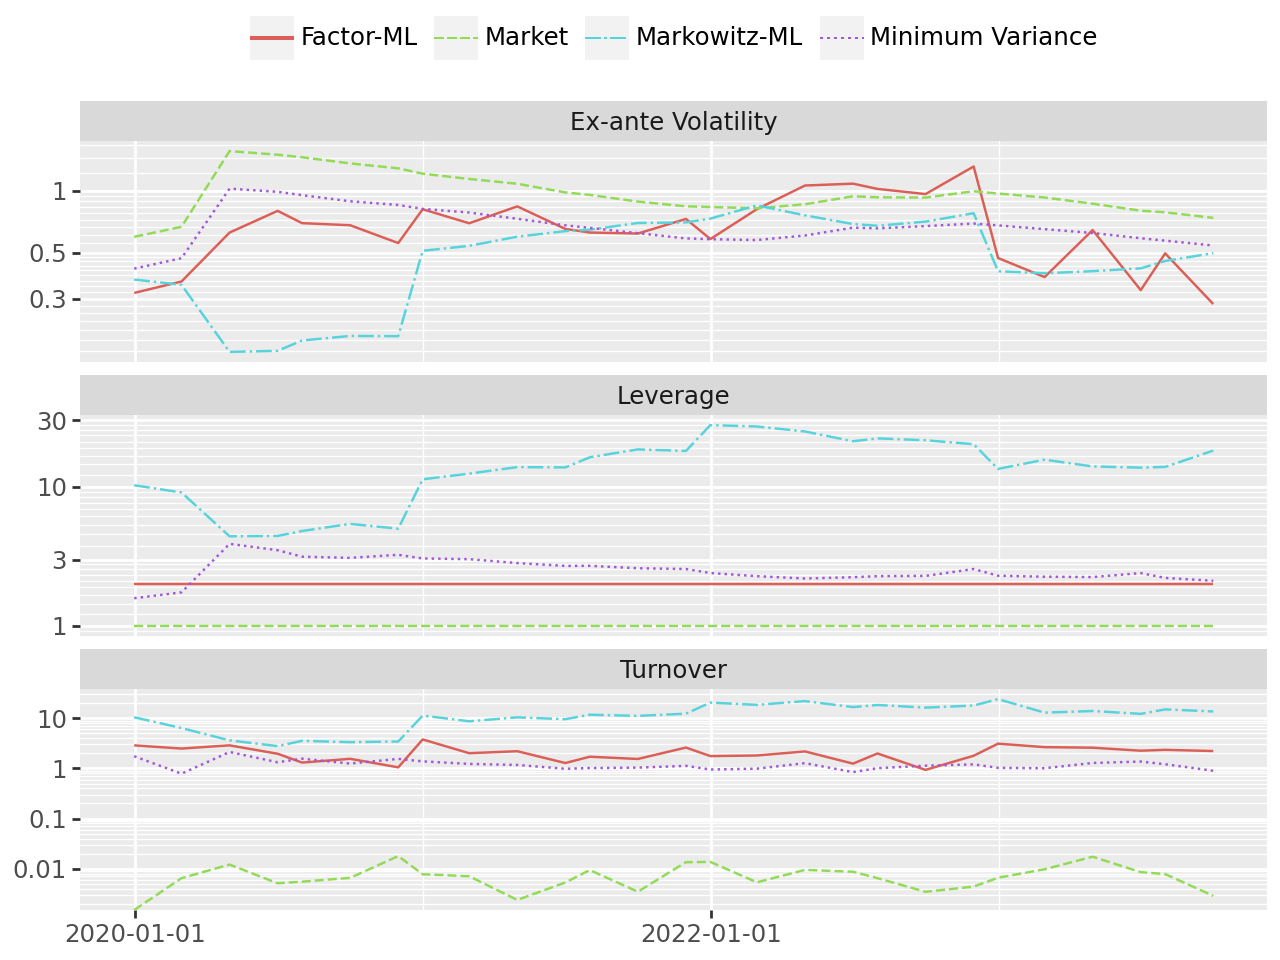

In [47]:
# --- 3. Beregn forventet porteføljerisiko ---
# Her kaldes din expected_risk_fun, som skal returnere en DataFrame med kolonnerne: 'type', 'eom' og 'pf_var'
pf_vars = expected_risk_fun(ws, dates=dates_oos, cov_list=barra_cov)
print("pf_vars columns:", pf_vars.columns)

# --- 4. Saml porteføljestatistikker ---
# Opret en ny kolonne 'eom' i pfs ud fra 'eom_ret' (her antages at eom = eom_ret - 1 måned)
pfs_stats = pfs.copy()
pfs_stats['eom'] = pfs_stats['eom_ret'] - pd.DateOffset(months=1)
pfs_stats = pfs_stats[['type', 'eom', 'inv', 'turnover']]
print("pfs_stats columns:", pfs_stats.columns)

# Merge pf_vars med pfs_stats på 'type' og 'eom'
comp_stats = pd.merge(pf_vars, pfs_stats, on=['type', 'eom'], how='inner')

# Filtrer for de relevante porteføljer (her er det de samme som i pf_order)
main_types = pf_order
comp_stats = comp_stats[comp_stats['type'].isin(main_types)]

# Udregn ex-ante volatilitet (e_sd) ud fra variansen (pf_var)
comp_stats['e_sd'] = np.sqrt(comp_stats['pf_var'] * 252)

# Fjern pf_var, da vi ikke skal plotte den
comp_stats = comp_stats.drop(columns=['pf_var'])

# --- 5. Transformér data til langt format ---
# Omform data fra bredt til langt format (pivot_longer i R svarer til melt i pandas)
comp_stats_long = comp_stats.melt(id_vars=['type', 'eom'],
                                   value_vars=['inv', 'turnover', 'e_sd'],
                                   var_name='name', value_name='value')

# Map variable-navne til læsevenlige betegnelser
name_mapping = {"e_sd": "Ex-ante Volatility", "turnover": "Turnover", "inv": "Leverage"}
comp_stats_long['name'] = comp_stats_long['name'].map(name_mapping)

# --- 6. Lav plottet med plotnine ---
plot_comp_stats = (
    ggplot(comp_stats_long, aes(x='eom', y='value', color='type', linetype='type'))
    + geom_line()
    + scale_y_log10()
    + labs(y="Value", x="")
    + facet_wrap('~name', scales="free_y", ncol=1)
    + theme(
          legend_position="top",
          legend_title=element_blank(),
          axis_title_x=element_blank(),
          axis_title_y=element_blank()
      )
)

# Vis plottet (i en Jupyter Notebook)
display(plot_comp_stats)
